<h1 style="text-align: center; color: #C0392B; font-family: Arial, sans-serif;">
  Energy Efficiency Data Set
</h1>

<h3 style="text-align: center; color: #7B241C; font-family: Arial, sans-serif;">
  Machine Learning
</h3>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense
from sklearn.multioutput import MultiOutputRegressor



2025-07-17 00:25:42.423390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752711942.666710      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752711942.734388      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load And Read Data
</h3>


In [2]:
df=pd.read_csv('/kaggle/input/energy-efficiency-data-set/energy_efficiency_data.csv')

In [3]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
# initial data preview:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.sample()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
704,0.69,735.0,294.0,220.5,3.5,2,0.4,4,14.54,16.81


In [6]:
df.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [7]:
# Check number of rows and columns: df.shape
df.shape[0]

768

In [8]:
df.shape[1]

10

In [9]:
#  Inspect column types and basic info: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [13]:
#  clean column names
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
 Initial Exploration and Analysis
</h3>


In [15]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Visualization
</h3>


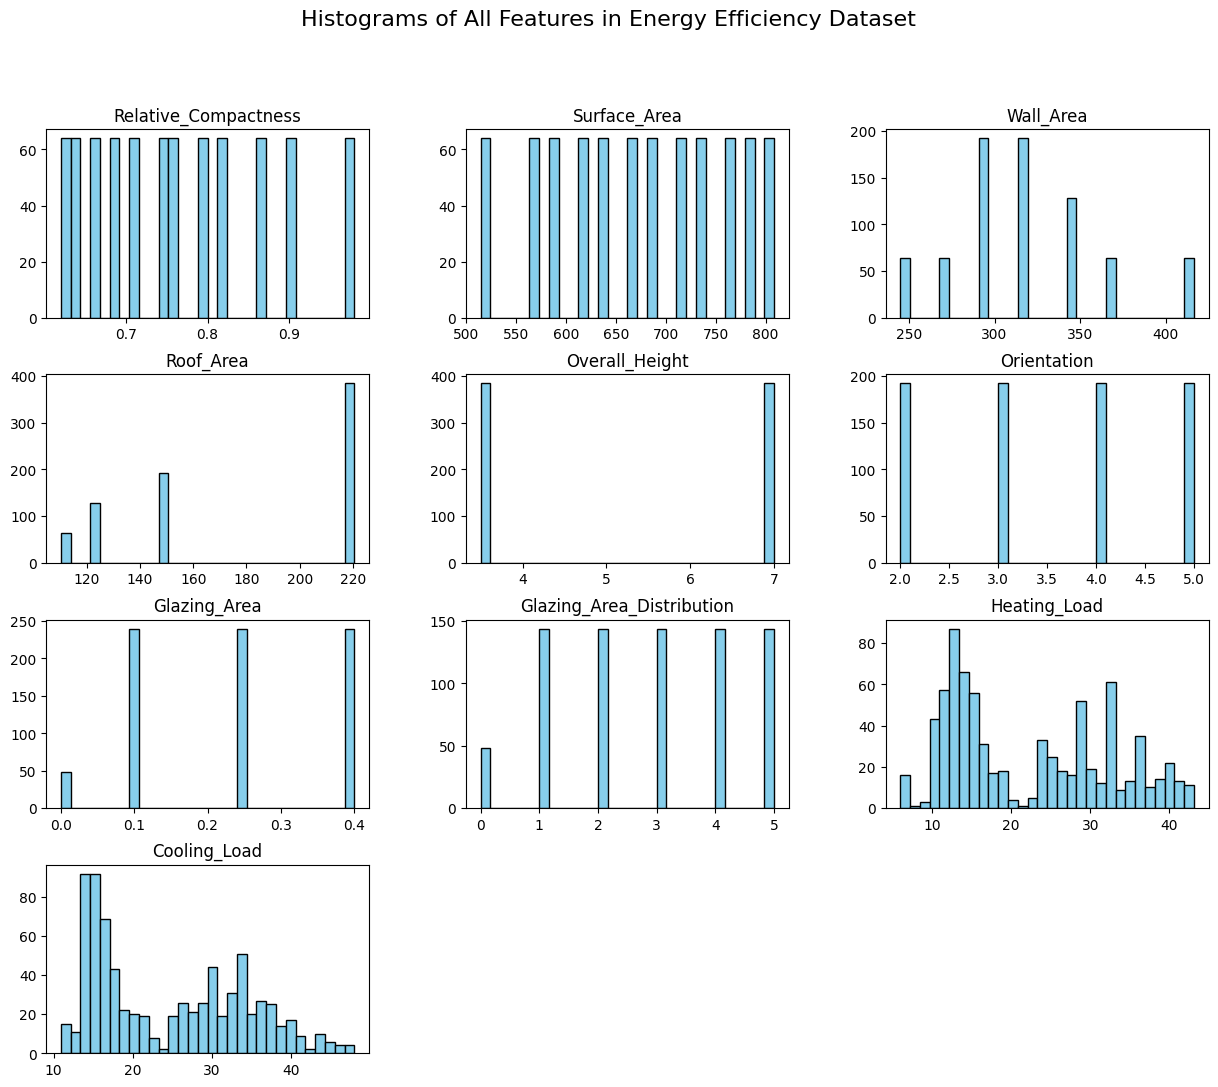

In [16]:

df.hist(bins=30, figsize=(15, 12), grid=False, edgecolor='black', color='skyblue')

plt.suptitle('Histograms of All Features in Energy Efficiency Dataset', fontsize=16)

plt.show()


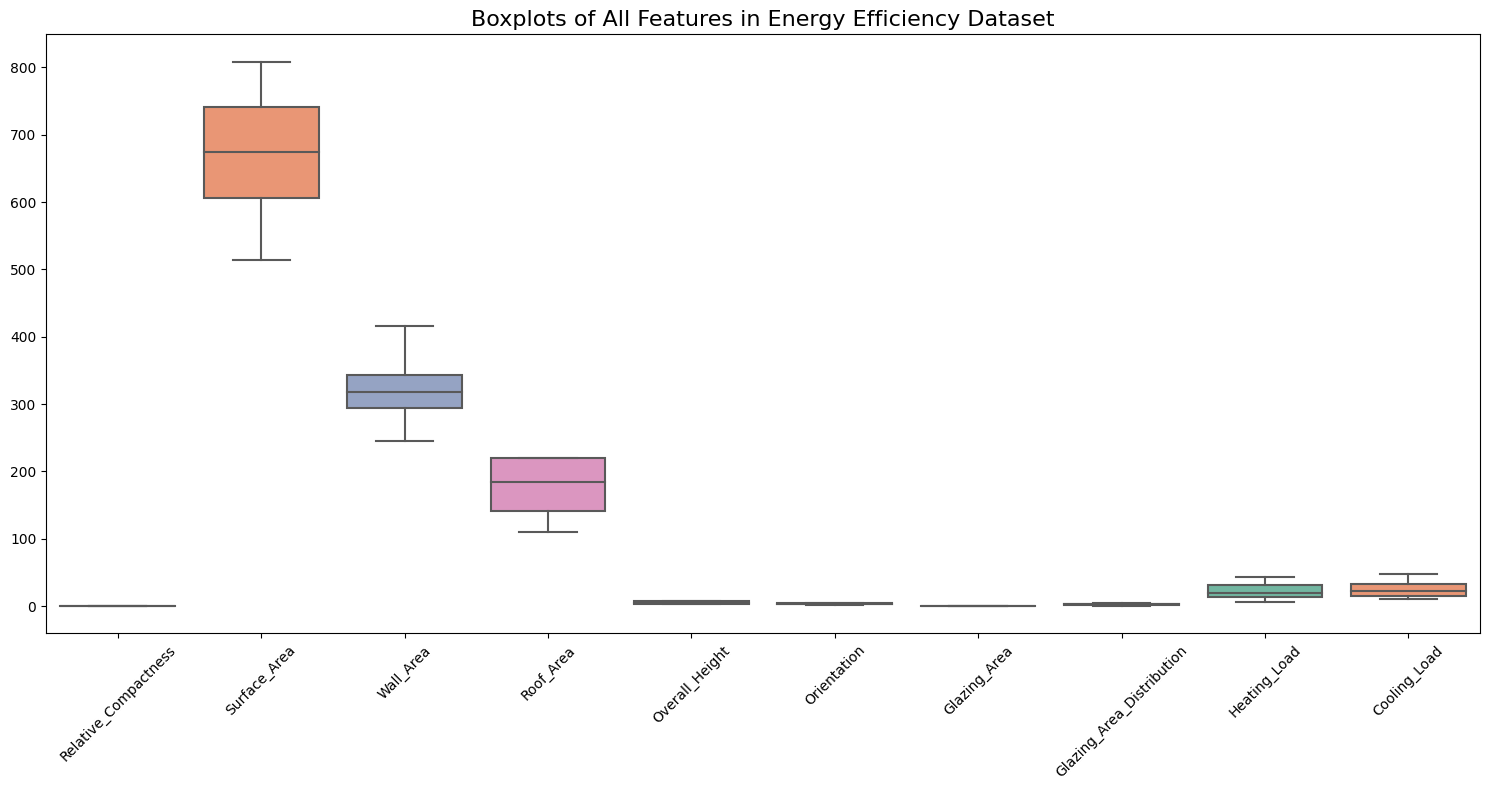

In [17]:
 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=45)
plt.title('Boxplots of All Features in Energy Efficiency Dataset', fontsize=16)
plt.tight_layout()
plt.show()


no outlier appear

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

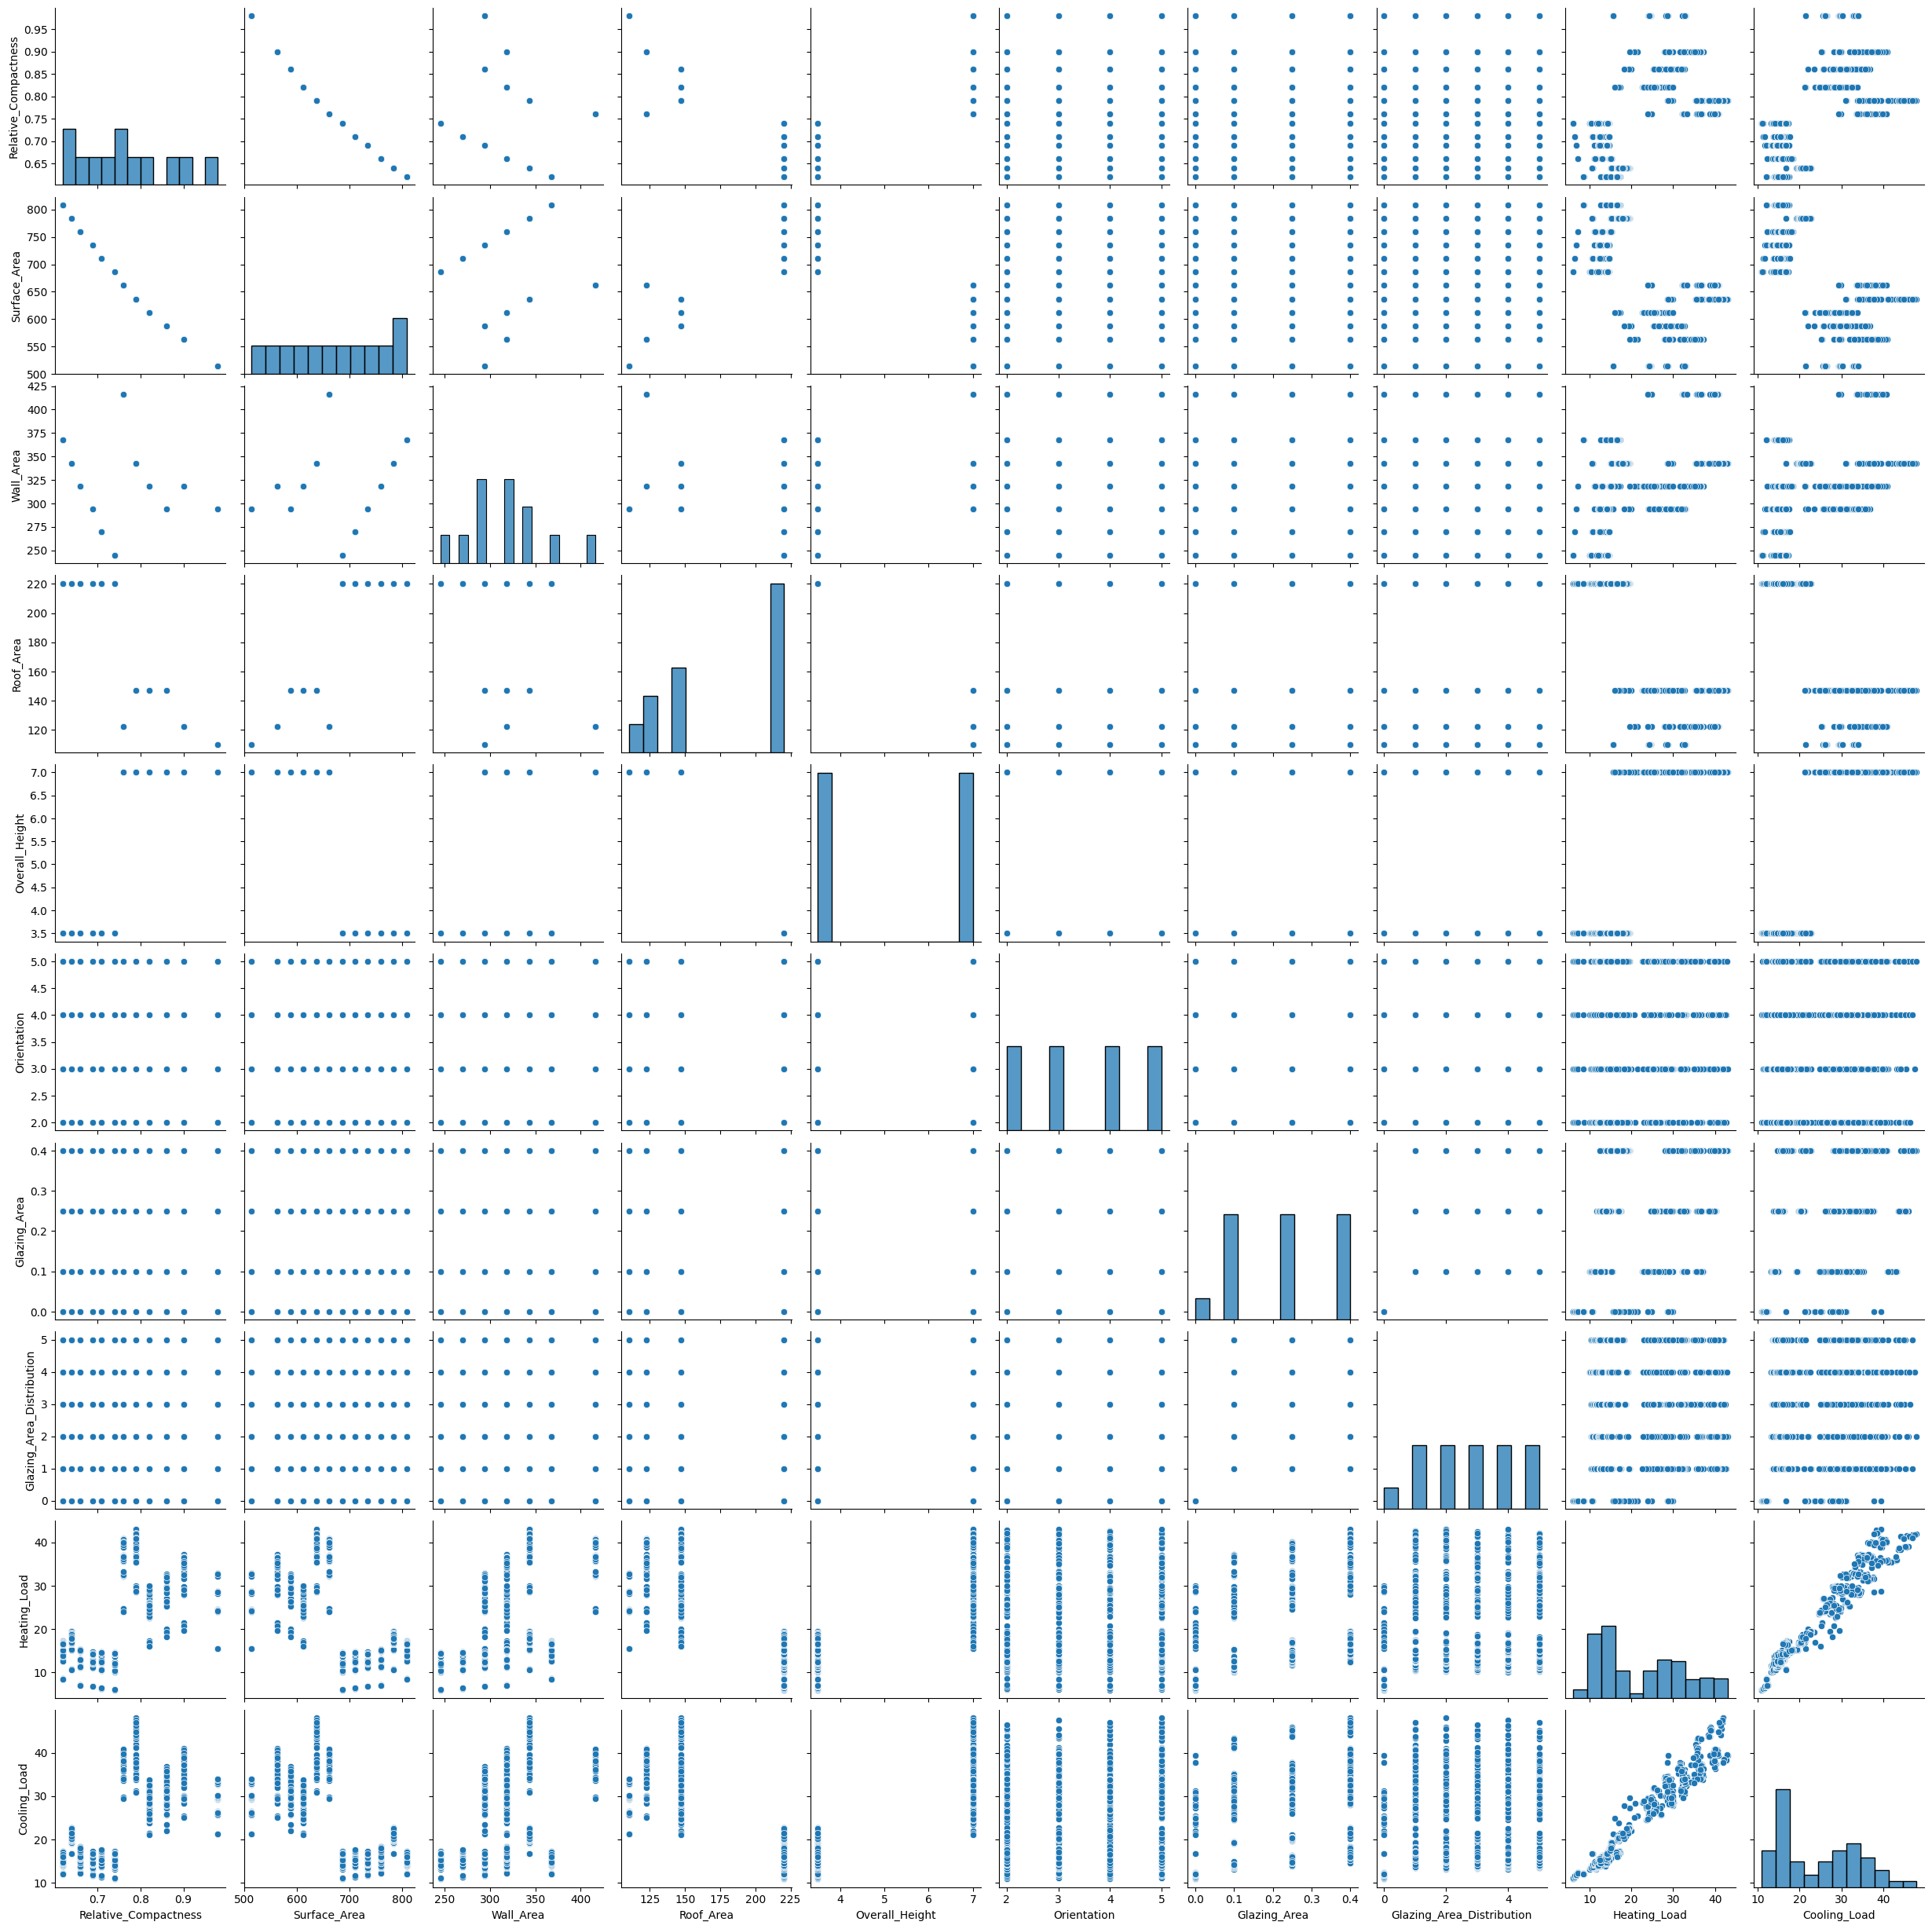

In [18]:
sns.pairplot(df)


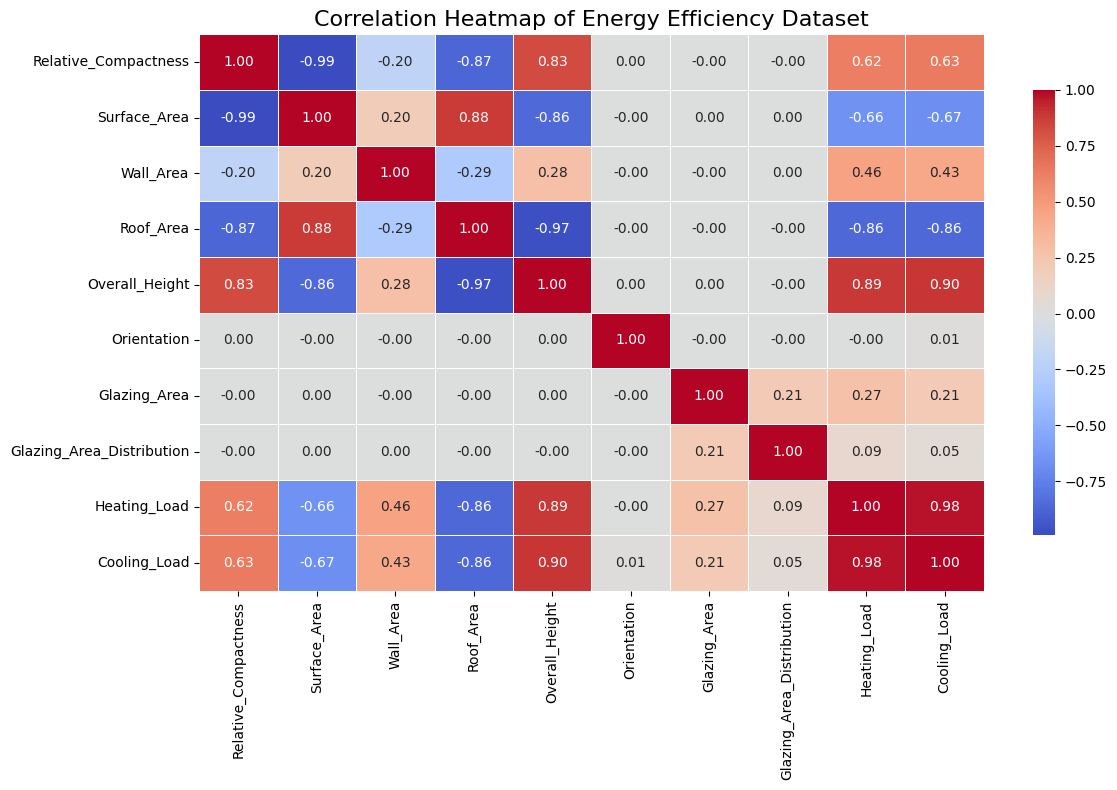

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,            
    fmt=".2f",             
    cmap='coolwarm',       
    linewidths=0.5,       
    cbar_kws={"shrink": .8}  
)


plt.title('Correlation Heatmap of Energy Efficiency Dataset', fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


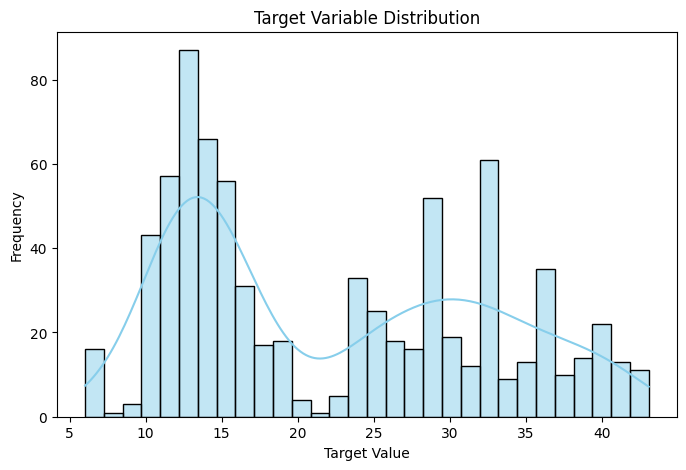

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Heating_Load'], bins=30, kde=True, color='skyblue')
plt.title('Target Variable Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


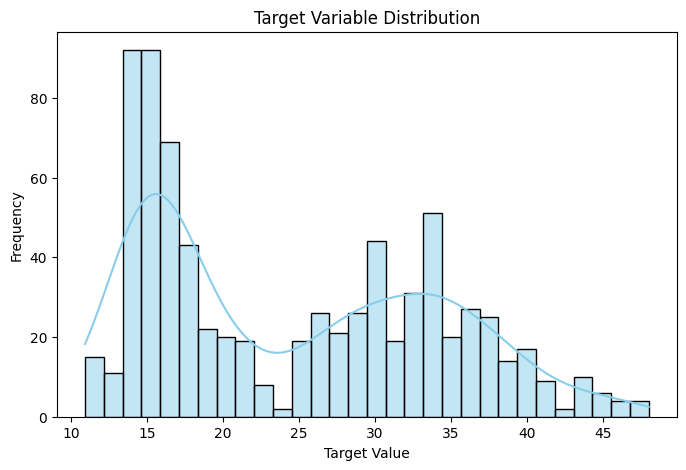

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Cooling_Load'], bins=30, kde=True, color='skyblue')
plt.title('Target Variable Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Prepare Data Before Model
</h3>


In [22]:
ds=df.copy()

In [23]:
#take cooling as target
correlation = ds.corr()
print(correlation['Cooling_Load'].sort_values(ascending=False))


Cooling_Load                 1.000000
Heating_Load                 0.975862
Overall_Height               0.895785
Relative_Compactness         0.634339
Wall_Area                    0.427117
Glazing_Area                 0.207505
Glazing_Area_Distribution    0.050525
Orientation                  0.014290
Surface_Area                -0.672999
Roof_Area                   -0.862547
Name: Cooling_Load, dtype: float64


In [24]:
ds.drop(columns=['Heating_Load','Orientation','Glazing_Area_Distribution'],inplace =True)

# drop heating load because case data leakage

In [25]:
x=ds.drop(columns=['Cooling_Load'])
y=ds['Cooling_Load']

In [26]:
x

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area
0,0.98,514.5,294.0,110.25,7.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4
764,0.62,808.5,367.5,220.50,3.5,0.4
765,0.62,808.5,367.5,220.50,3.5,0.4
766,0.62,808.5,367.5,220.50,3.5,0.4


In [27]:
y

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling_Load, Length: 768, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Model With One Target
</h3>


In [30]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE:  1.17
MSE:  3.06
RMSE: 1.75
R2 Score: 0.97


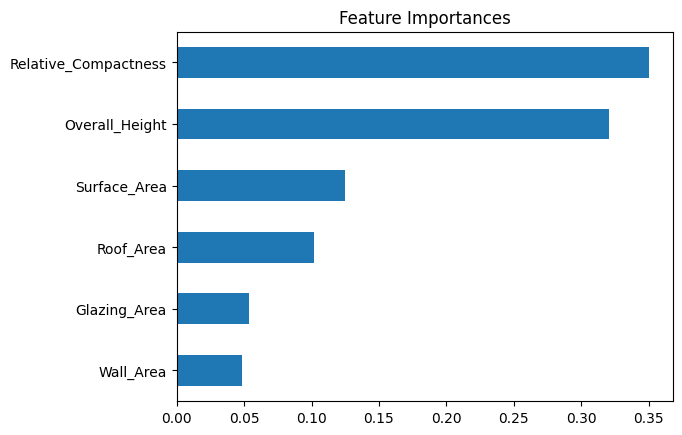

In [32]:
feature_importance = pd.Series(model_rf.feature_importances_, index=x.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

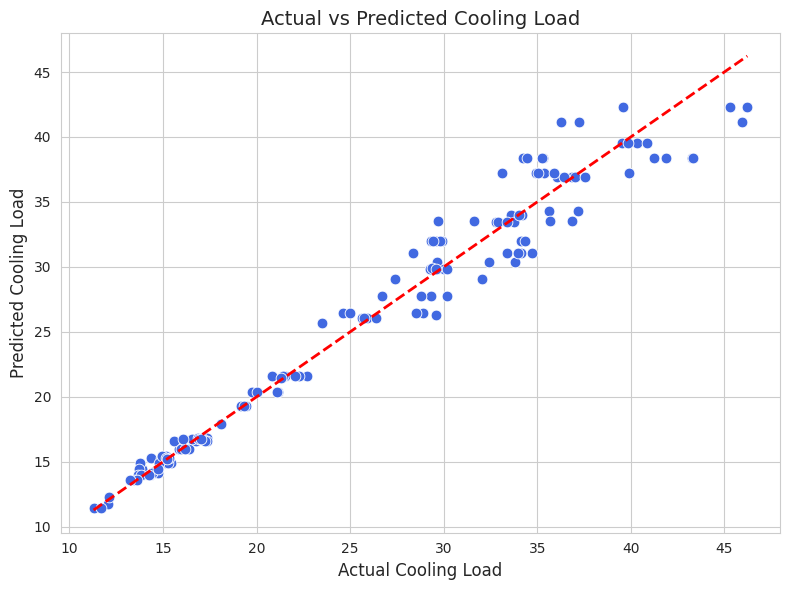

In [33]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Cooling Load', fontsize=14)
plt.xlabel('Actual Cooling Load', fontsize=12)
plt.ylabel('Predicted Cooling Load', fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
# SVM Model
svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train, y_train)

SVR()

In [35]:
y_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 1.83
MSE: 8.43
RMSE: 2.90
R² Score: 0.91


In [36]:
# NN 
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  

2025-07-17 00:26:28.972313: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 670.0660 - mae: 23.9914 - val_loss: 500.0154 - val_mae: 20.7223
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 574.0881 - mae: 21.7879 - val_loss: 388.9346 - val_mae: 17.8643
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 436.1243 - mae: 18.2331 - val_loss: 240.1275 - val_mae: 13.1993
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 283.6117 - mae: 13.7053 - val_loss: 95.0672 - val_mae: 7.3364
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123.2240 - mae: 8.2483 - val_loss: 29.2364 - val_mae: 3.5591


In [39]:
y_pred_nn = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)
print(f"Neural Network MSE: {mse:.2f}")
print(f"Neural Network R² Score: {r2:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network MSE: 64.71
Neural Network R² Score: 0.30


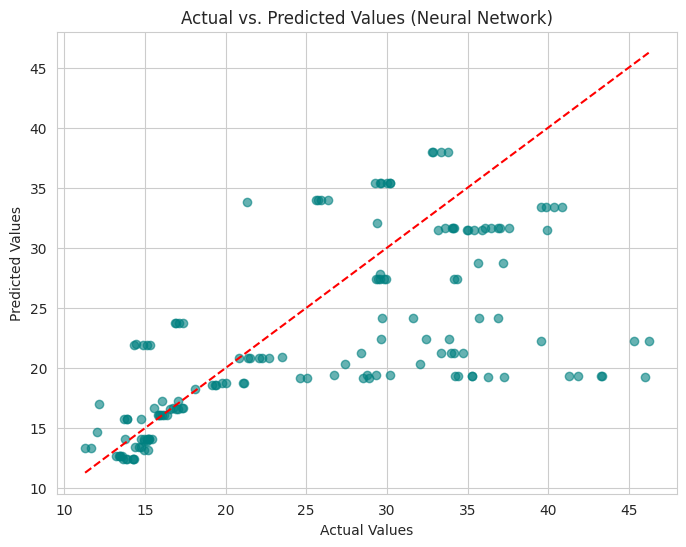

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.grid(True)
plt.show()

<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Model With Tow Target
</h3>


In [41]:
df.columns

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [42]:
X=df.drop(columns=['Cooling_Load','Heating_Load'])
y=df[['Cooling_Load','Heating_Load']]

In [43]:
y

,Cooling_Load,Heating_Load
0,21.33,15.55
1,21.33,15.55
2,21.33,15.55
3,21.33,15.55
4,28.28,20.84
...,...,...
763,21.40,17.88
764,16.88,16.54
765,17.11,16.44
766,16.61,16.48


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred = model_rf.predict(X_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE:  0.77
MSE:  1.66
RMSE: 1.29
R2 Score: 0.98


In [48]:
# SVM Model
base_svr = SVR(kernel='rbf')
svr_model = MultiOutputRegressor(base_svr)
svr_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [49]:
y_pred = svr_model.predict(X_test)


In [50]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.72
MSE: 7.52
RMSE: 2.74
R² Score: 0.92


In [51]:
# Neural Network
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2)) 


In [52]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [53]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 636.3995 - mae: 23.1809 - val_loss: 484.8203 - val_mae: 20.5113
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 593.5282 - mae: 22.5220 - val_loss: 406.1420 - val_mae: 18.7859
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 463.3264 - mae: 19.6437 - val_loss: 286.2554 - val_mae: 15.7695
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 319.4501 - mae: 16.1874 - val_loss: 143.4813 - val_mae: 10.9231
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.0033 - mae: 11.3187 - val_loss: 49.8509 - val_mae: 6.3433


In [54]:
y_pred_nn = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print(f"Neural Network MSE (Overall): {mse:.2f}")
print(f"Neural Network R² Score (Overall): {r2:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network MSE (Overall): 80.87
Neural Network R² Score (Overall): 0.17


<h1 style="text-align: center; color: #C0392B; font-family: Arial, sans-serif;">
  Thanks
</h1>


